# **HOUSE PRICE DETECTION PROJECT USING SIMPLE LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION**

DATASET useed: https://www.kaggle.com/datasets/shree1992/housedata/code?datasetId=46927 

IMPORTING LIBRARIES

In [126]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

LOADING DATASET

In [127]:
dataset = pd.read_csv("data.csv")
dataset.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


EXPLORATORY DATA ANALYSIS

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**SIMPLE LINEAR REGRESSION MODEL**


---

In the following experiment we build a simple linear regression model to predict the price of a house on the basis of number of bedrooms. 

In simple linear regression model we can have only one independent variable. 
As you know the dataset has various features. In order to implement a simple linear regression model, I have assumed "number of bedrooms" as the independent variable. 


In [130]:
#selecting the independent (Size) and dependent (rent) variables
X = dataset.iloc[:, 2].values
y = dataset.iloc[:, 1].values

In [131]:
print(X)

[3. 5. 3. ... 3. 4. 3.]


In [132]:
#reconstructing X from 1D to 2D for training purposes
X = X.reshape(-1, 1)

In [133]:
print(X)

[[3.]
 [5.]
 [3.]
 ...
 [3.]
 [4.]
 [3.]]


In [134]:
print(y)

[ 313000.   2384000.    342000.   ...  416904.17  203400.    220600.  ]


Splitting dataset into train and test set

In [135]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Building and training Regression model

In [136]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Making predictions

In [137]:
y_pred = regressor.predict(X_test)

Visualizing the results

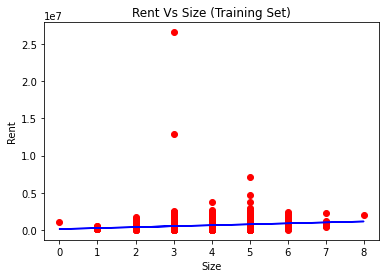

In [138]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Rent Vs Size (Training Set)")
plt.xlabel("Size")
plt.ylabel("Rent")
plt.show()

The above graph shows the real values (red dots) in relation to the observed values (blue line) in the training set. 

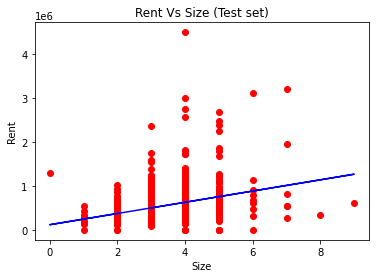

In [139]:
plt.scatter(X_test, y_test, color = "red") #this is the real value
plt.plot(X_test, y_pred, color = "blue") #this is the predicted value
plt.title("Rent Vs Size (Test set)")
plt.xlabel("Size")
plt.ylabel("Rent")
plt.show()

CONCLUSION: We see that most of the real values (red dots) are close to the predicted values (blue line) when using the test set. This indicates that the model is performing well.
However, we must keep in mind that originally this particular dataset takes into consideration a number of features in determining house price. 
This above experiment was perfomed assuming the "Number of bedrooms" feature alone, determines the house price. This assumption was made to implement a simple linear regression model.

We know for single regression model, y = b0 + b1x1
The values of b0 and b1 can be determined as follows

In [141]:
coeff1 = regressor.coef_
intercept1 = regressor.intercept_
print("The coefficient of X is b1 = ", coeff1)
print("The constant b0 is ", intercept1)

The coefficient of X is b1 =  [127451.65]
The constant b0 is  118113.14609591535


Making single predictions

1. For a 3 bed the price would be?
2. For a 1 bed the price would be?
3. For a 2 bed the price would be?
4. Again, for a 1 bed the price would be?

In [143]:
ans1 = regressor.predict([[3]])
print("The prediction of price for a 3 bed house is ", ans1)
ans2 = regressor.predict([[1]])
print("The prediction of price for a 1 bed house is ", ans2)
ans3 = regressor.predict([[2]])
print("The prediction of price for a 2 bed house is ", ans3)
ans4 = regressor.predict([[1]])
print("The prediction of price for a 1 bed house is ", ans4)

The prediction of price for a 3 bed house is  [500468.09]
The prediction of price for a 1 bed house is  [245564.79]
The prediction of price for a 2 bed house is  [373016.44]
The prediction of price for a 1 bed house is  [245564.79]


**MULTIPLE LINEAR REGRESSION**

---

In the following experiment we will use various features to determine the price of a house. 
You will see that some features will not be used since it is assumed they are less significant than others in determing the price. 


In [144]:
#checking the available columns and their types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [145]:
#convert date to get just the year in int type
dataset["date"] = pd.to_datetime(dataset["date"])
dataset['year'] = dataset['date'].dt.strftime('%Y')
dataset['year'] = dataset['year'].astype('int')
dataset.drop(['date'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  year           4600 non-null   int64  
dtypes: float

We see there is only one country. The features like street, statezip and country are assumed to not have much significance. Hence we remove them from the database

In [146]:
dataset["country"].value_counts()

USA    4600
Name: country, dtype: int64

In [147]:
dataset = dataset.drop(columns=["street", "statezip", "country"])

In [148]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,2014


In [149]:
#to make dtype of city change from object to int

dataset["city"]= dataset["city"].apply({"Seattle":0, "Renton":1, "Bellevue":2, "Redmond":3, "Issaquah":4, "Kirkland":5, "Kent":6, "Auburn":7, "Sammamish":8, "Federal Way":9, 
 "Shoreline":9, "Woodinville":10, "Maple Valley":11, "Mercer Island":12, "Burien":13, "Snoqualmie": 14, "Kenmore":15, "Des Moines":16, 
 "North Bend":17, "Covington":18, "Duvall":19, "Lake Forest Park":20, "Bothell":21, "Newcastle":22, "SeaTac":23, "Tukwila":24, "Vashon":25,
 "Enumclaw":26, "Carnation":27, "Normandy Park":28, "Clyde Hill":29, "Medina":30, "Fall City":31, "Black Diamond":32, "Ravensdale":33, "Pacific":34, 
 "Algona":35, "Yarrow Point":36, "Skykomish":37, "Preston":38, "Milton":39, "Inglewood-Finn Hill":40, "Snoqualmie Pass":41, "Beaux Arts Village":42
}.get)

In [150]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,9,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,6,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,2,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,3,2014


In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int64  
 14  year           4600 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 539.2 KB


Selecting the independent and dependent variables

In [152]:
X = dataset.drop(columns="price", axis = 1)
y = dataset["price"]

In [153]:
print(X)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [154]:
print(y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


Splitting the dataset in train and test set

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Building and Training the model

In [156]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Testing the model

In [157]:
y_pred = regressor.predict(X_test)

Evaluating the score of trained model on test set

In [158]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Square Error is ", mse)
print("r2_score is ", r2)

Mean Square Error is  65046139726.26597
r2_score is  0.5603458393061493


Multiple Linear regression is:
y = b0 + x1b1 + x2b2 + x3b3 + ... + xnbn
The value of b0, b1, b2 ..., bn can be determined as follows

In [159]:
coeff = regressor.coef_
intercept = regressor.intercept_
print("The coefficients b1, b2 ... bn are: ", coeff)
print("B0 is ", intercept)

The coefficients b1, b2 ... bn are:  [-5.58e+04  6.20e+04  1.57e+02 -4.76e-01  1.34e+04  3.37e+05  4.69e+04
  3.53e+04  9.67e+01  6.08e+01 -1.90e+03  7.14e+00 -5.40e+03  0.00e+00]
B0 is  3702473.416198492


Making new predictions on trained model

A 3 bedroom 2 bath house with 1500 sq feet size, 6000 sq feet loft, on the 3rd floor, 0 waterfront and view, condition 5, 3000 sq feet above, 0 basement, built in 2000 and renovated in 2019 in Seattle city available in year 2022. 

In [ ]:
ans = regressor.predict([[3, 2, 1500, 6000, 3, 0, 0, 5, 3000, 0, 2000, 2019, 0, 2022]])

In [167]:
print("The predicted house price on the basis of above requirements is ", ans)

The predicted house price on the basis of above requirements is  [609465.33]
